<a href="https://colab.research.google.com/github/flavianacif/DSWP/blob/master/RFB_RN_16_COM_DADOS_NOVOS_ULTIMO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:

import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import tensorflow_addons as tfa

from tensorflow import keras

[**Python**] - Verificar a versão do Tensorflow
> Assegurar que está a utilizar a versão 2.x.

In [2]:
tf.__version__

'2.3.0'

[**Python**] - Definir o número de casas decimais

In [3]:
np.set_printoptions(precision= 3)

### 1. Carregar os dados

[**Python**] - Carregar os dados:

In [13]:
# Leitura do dataframe:
df = pd.read_csv('/total_8.csv')

In [22]:
df_total = df.copy()

In [224]:
df_total[]



<bound method DataFrame.all of            md1       md2       md3  ...  cnae_secao_Q  cnae_secao_R  cnae_secao_S
id                                  ...                                          
0     0.090339  0.011256  0.111095  ...             1             0             0
1     0.005996  0.019476  0.124770  ...             0             0             0
2     0.000006  0.002902  0.110160  ...             0             0             0
3     0.000009  0.014526  0.120351  ...             0             0             0
4     0.000191  0.004042  0.111078  ...             0             0             0
...        ...       ...       ...  ...           ...           ...           ...
8609  0.000000  0.001109  0.109456  ...             0             0             0
3384  0.000349  0.002435  0.110167  ...             0             0             0
8297  0.008200  0.006795  0.112855  ...             0             0             0
7556  0.036538  0.017085  0.121296  ...             1             0

In [ ]:
df_total = df_total.drop(columns = )

In [23]:
df_total.set_index('id', inplace=True)

In [24]:
df_X = df_total[df_total['target']!= 2]

In [25]:
df_y = df_X['target']
df_X = df_X.drop(columns= ['target'])

In [26]:
X_test = df_total[df_total['target']== 2].drop(columns= ['target'])

In [27]:
#df_test = pd.read_csv('/test_6.csv')

In [28]:
#df_train.shape

In [29]:
df_X.head()

,md1,md2,md3,md4,md5,md6,md7,md8,md9,md10,md11,md12,mc1,mc2,mc3,mc4,ind01,ind02,ind03,ind04,ind05,ind06,ind07,ind08,ind09,ind10,ind11,ind12,ind13,ind14,ind15,ind16,ind17,ind18,ind19,ind20,ind21,ind22,ind23,ind24,...,cnae2_81,cnae2_82,cnae2_85,cnae2_86,cnae2_87,cnae2_90,cnae2_91,cnae2_93,cnae2_94,cnae2_95,cnae2_96,rf2_d,rf2_i,rf2_k,rf2_p,rf2_q,rf2_r,rf2_s,rf2_v,rf2_y,rf2_z,cnae_secao_0,cnae_secao_A,cnae_secao_B,cnae_secao_C,cnae_secao_D,cnae_secao_E,cnae_secao_F,cnae_secao_G,cnae_secao_H,cnae_secao_I,cnae_secao_J,cnae_secao_K,cnae_secao_L,cnae_secao_M,cnae_secao_N,cnae_secao_P,cnae_secao_Q,cnae_secao_R,cnae_secao_S
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.090339,0.011256,0.111095,0.003233,0.003233,0.0,0.016366,0.021082,0.004541,0.004541,0.0,0.130930,0.009247,0.001729,0.000138,0.004412,0.0,0.0281,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,1.0,0.0000,0.00,0.00,0.0000,0.0000,...,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0.005996,0.019476,0.124770,0.000000,0.038168,0.0,0.029214,0.046445,0.000000,0.049919,0.0,0.149741,0.003186,0.007671,0.006943,0.003589,0.0,0.0000,1.0,0.4167,0.4194,0.7068,0.0076,0.0076,0.0,0.0,0.0,0.0856,0.0286,0.0,0.0,0.0,0.0,0.0,0.0,0.7625,1.00,1.00,0.1429,0.2857,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0.000006,0.002902,0.110160,0.002274,0.002274,0.0,0.002902,0.020058,0.003131,0.003131,0.0,0.130405,0.000015,0.000000,0.000050,0.000209,0.0,0.0000,1.0,1.0000,1.0000,1.0000,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,1.0,1.0000,1.00,1.00,1.0000,1.0000,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0.000009,0.014526,0.120351,0.000000,0.000000,0.0,0.014526,0.032017,0.000000,0.000000,0.0,0.142568,0.000438,0.000000,0.000042,0.000115,0.0,0.0000,0.0,0.0000,0.0000,0.0000,0.2309,0.2309,0.0,0.0,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,1.0000,0.25,0.25,0.9167,0.9167,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0.000191,0.004042,0.111078,0.001121,0.001121,0.0,0.006063,0.023705,0.011886,0.011886,0.0,0.131285,0.001925,0.004829,0.006355,0.000719,0.0,0.0000,0.0,0.0000,0.0000,0.0000,1.0000,1.0000,0.0,0.0,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.00,0.00,0.0000,0.0000,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


[**Python**] - Mostrar as primeiras 5 linhas:

In [30]:
X_test.head()

,md1,md2,md3,md4,md5,md6,md7,md8,md9,md10,md11,md12,mc1,mc2,mc3,mc4,ind01,ind02,ind03,ind04,ind05,ind06,ind07,ind08,ind09,ind10,ind11,ind12,ind13,ind14,ind15,ind16,ind17,ind18,ind19,ind20,ind21,ind22,ind23,ind24,...,cnae2_81,cnae2_82,cnae2_85,cnae2_86,cnae2_87,cnae2_90,cnae2_91,cnae2_93,cnae2_94,cnae2_95,cnae2_96,rf2_d,rf2_i,rf2_k,rf2_p,rf2_q,rf2_r,rf2_s,rf2_v,rf2_y,rf2_z,cnae_secao_0,cnae_secao_A,cnae_secao_B,cnae_secao_C,cnae_secao_D,cnae_secao_E,cnae_secao_F,cnae_secao_G,cnae_secao_H,cnae_secao_I,cnae_secao_J,cnae_secao_K,cnae_secao_L,cnae_secao_M,cnae_secao_N,cnae_secao_P,cnae_secao_Q,cnae_secao_R,cnae_secao_S
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3411,0.017485,0.004743,0.111771,0.003121,0.003121,0.0,0.005432,0.023085,0.009890,0.011346,0.0,0.131320,0.000176,0.000000,1.442161e-09,0.000917,0.0,0.0326,0.0,1.0,1.0,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0000,0.0000,0.75,0.75,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2177,0.012269,0.005919,0.111803,0.001136,0.000000,0.0,0.006160,0.022035,0.001686,0.000000,0.0,0.132734,0.005597,0.004738,8.343705e-06,0.001462,0.0,0.0135,0.0,0.0,0.0,1.0,1.0000,1.0000,0.0,0.0,0.0,0.0293,0.5883,0.1016,0.0,0.0,0.0,0.0,0.0000,0.0000,1.00,0.00,0.0,0.0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
8400,0.002325,0.001882,0.109870,0.000000,0.000000,0.0,0.002823,0.020522,0.000000,0.000000,0.0,0.131390,0.000206,0.000000,7.473043e-05,0.000659,0.0,0.0438,0.0,1.0,1.0,1.0,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0,1.0000,1.0000,0.00,0.00,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
464,0.022149,0.042115,0.143274,0.052107,0.005284,0.0,0.042115,0.056179,0.044911,0.004436,0.0,0.145176,0.003389,0.000693,1.104422e-03,0.003108,0.0,0.0000,0.0,0.0,0.0,0.0,0.4810,0.8654,0.0,0.0,0.0,0.3209,0.1926,0.0000,0.0,0.0,0.0,0.0,0.8694,0.9212,0.75,0.75,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
6672,0.011190,0.004536,0.110678,0.002873,0.003131,0.0,0.004536,0.020658,0.003853,0.004202,0.0,0.130692,0.000763,0.000000,0.000000e+00,0.000387,0.0,0.0153,0.0,0.0,0.0,0.0,0.7799,0.7799,0.0,0.0,0.0,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0000,1.0000,0.00,0.00,0.0,0.0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


### Pré-processamento e transformação dos dados

[**Python**] - Normalizar os dados - StandardScaler()

### 3. Definir as amostras de treinamento e validação

[**Python**] - Definir as amostras de treinamento e validação

In [31]:
from sklearn.model_selection import train_test_split

X_treinamento, X_teste, y_treinamento, y_teste= train_test_split(df_X, df_y, test_size = 0.1, random_state = 22091980) #20111974)
print(f'X: Treinamento=  {X_treinamento.shape}; X: Teste=  {X_teste.shape}')

X: Treinamento=  (9929, 184); X: Teste=  (1104, 184)


In [32]:
print(f'Y: Treinamento =  {y_treinamento.shape}; Y: Teste = {y_teste.shape}')

Y: Treinamento =  (9929,); Y: Teste = (1104,)


### 4. Definir a arquitetura da Rede Neural com _Tensorflow_/_Keras_

[**Python**] - Definir a arquitetura, ou seja:
* $N_{I}$: Número de neurônios na camada de entrada (_Input Layer_);
* $N_{O}$: Número de neurônios na camada de saída (_Output Layer_);
* $N_{H}$: Número de neurônios na camada escondida (_Hidden Layer_);
* FA: Função de ativação;

In [278]:
# Número de Neurônios na Input Layer:
N_I = 184

# Número de neurônios na Output Layer:
N_O = 1

# Número de neurônios na Hidden Layer:
N_H = 120

N_H2 = 80

N_H3=40

N_H4 = 80

# Função de Ativação da Hidden Layer:
FA_H = tf.nn.leaky_relu
#FA_H = tf.keras.activations.swish

# Função de Ativação da Output Layer:
FA_O = tf.keras.activations.sigmoid




[**Python**] - Definir as sementes para NumPy e Tensorflow:
> Por questões de reproducibilidade de resultados, use as sementes abaixo:

* NumPy: 20111974;
* Tensorflow: 20111974;

In [279]:
np.random.seed(19800922)
tf.random.set_seed(22091980)


[**Python**] - Definir a Rede Neural:





* 1 camada _dropout_ com $p= 0.1$:

In [280]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

RN= Sequential()
RN.add(Dense(N_H, input_dim= N_I, kernel_initializer= tf.keras.initializers.GlorotNormal(), activation= FA_H, kernel_constraint= tf.keras.constraints.UnitNorm()))
RN.add(Dropout(0.3))
RN.add(Dense(N_H2, kernel_initializer= tf.keras.initializers.GlorotNormal(), activation= FA_H, kernel_constraint= tf.keras.constraints.UnitNorm()))
RN.add(Dropout(0.3))
RN.add(Dense(N_H3, kernel_initializer= tf.keras.initializers.GlorotNormal(), activation= FA_H, kernel_constraint= tf.keras.constraints.UnitNorm()))
RN.add(Dropout(0.3))
#RN.add(Dense(N_H4, kernel_initializer= tf.keras.initializers.GlorotNormal(), activation= FA_H, kernel_constraint= tf.keras.constraints.UnitNorm()))
#RN.add(Dropout(0.2))
RN.add(Dense(units= N_O, activation= FA_O))

# Resumo da arquitetura da Rede Neural
print(RN.summary())

Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_145 (Dense)            (None, 120)               22200     
_________________________________________________________________
dropout_114 (Dropout)        (None, 120)               0         
_________________________________________________________________
dense_146 (Dense)            (None, 80)                9680      
_________________________________________________________________
dropout_115 (Dropout)        (None, 80)                0         
_________________________________________________________________
dense_147 (Dense)            (None, 40)                3240      
_________________________________________________________________
dropout_116 (Dropout)        (None, 40)                0         
_________________________________________________________________
dense_148 (Dense)            (None, 1)               

### 5. Compilar a Rede Neural

Este é um problema de classificação binária (_Male_ ou _Female_). Portanto, temos:
* optimizer= tf.keras.optimizers.Adam();
* loss=  tf.keras.losses.MeanSquaredError() ou loss= tf.keras.losses.BinaryCrossentropy(). Particularmente, eu gosto de usar loss=  tf.keras.losses.MeanSquaredError() porque o resultado é mais intuitivo;
* metrics= tf.keras.metrics.binary_accuracy.

[**Python**] - Comando modelo.compile(optimizer, loss, metrics):

In [281]:

Algoritmo_Opt = tf.keras.optimizers.Adam()
#Algoritmo_Opt = tf.keras.optimizers.Adam(learning_rate=0.01, beta_1=0.8, beta_2=0.99, epsilon=1e-07 , amsgrad=True,     name='Adam')
Loss_Function = tf.keras.losses.MeanSquaredError()
#Metrics_Perf = tf.keras.metrics.binary_accuracy
#Metrics_Perf = 2 * (tf.keras.metrics.Recall() * tf.keras.metrics.Precision())/(tf.keras.metrics.Recall() + tf.keras.metrics.Precision())
#recall = tf.keras.metrics.Recall()
#prec = tf.keras.metrics.Precision()
#Metrics_Perf = 2 * (prec * recall) / (prec + recall)
#Metrics_Perf = tfa.metrics.F1Score(     num_classes= 1 , name=  'f1_score',threshold=0.9  )
#F1 = 2 * (precision * recall) / (precision + recall)
Metrics_Perf = tf.keras.metrics.binary_accuracy
RN.compile(optimizer = Algoritmo_Opt, loss = Loss_Function,metrics = Metrics_Perf)

### 6. Ajustar a Rede Neural

Obs.: A opção callbacks abaixo implementa o conceito de _early stopping_. Esta opção vai parar o processo de treinamento da Rede Neural antes de atingirmos o númerco de _epochs_ quando o modelo pára de melhorar, medido pela métrica val_loss. O parâmetro _patience_= k significa que o processo de otimização vai parar se tivermos k _epochs_ consecutivas sem observarmos melhoria da performance da Rede Neural.

[**Python**] - Comando modelo.fit(X_treinamento, y_treinamento, epochs)

In [282]:

callbacks = [tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 10, min_delta = 0.001)]
hist= RN.fit(X_treinamento, y_treinamento, epochs = 100, 
             validation_data = (X_teste, y_teste), 
             callbacks = callbacks)

Epoch 1/100
311/311 [==============================] - 1s 4ms/step - loss: 0.1693 - binary_accuracy: 0.7660 - val_loss: 0.1500 - val_binary_accuracy: 0.7880
Epoch 2/100
311/311 [==============================] - 1s 2ms/step - loss: 0.1617 - binary_accuracy: 0.7685 - val_loss: 0.1504 - val_binary_accuracy: 0.7880
Epoch 3/100
311/311 [==============================] - 1s 2ms/step - loss: 0.1588 - binary_accuracy: 0.7697 - val_loss: 0.1471 - val_binary_accuracy: 0.7917
Epoch 4/100
311/311 [==============================] - 1s 2ms/step - loss: 0.1566 - binary_accuracy: 0.7736 - val_loss: 0.1477 - val_binary_accuracy: 0.7889
Epoch 5/100
311/311 [==============================] - 1s 2ms/step - loss: 0.1547 - binary_accuracy: 0.7762 - val_loss: 0.1464 - val_binary_accuracy: 0.7953
Epoch 6/100
311/311 [==============================] - 1s 2ms/step - loss: 0.1537 - binary_accuracy: 0.7800 - val_loss: 0.1455 - val_binary_accuracy: 0.7908
Epoch 7/100
311/311 [==============================] - 1s 

In [188]:
def Model_Loss(hist):
    print(hist.history.keys())
    plt.plot(hist.history['loss'])
    plt.plot(hist.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epochs')
    plt.legend(['Training', 'Validation'], loc= 'upper right')
    plt.show()

def Model_Accuracy(hist):
    print(hist.history.keys())
    plt.plot(hist.history['accuracy'])
    plt.plot(hist.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epochs')
    plt.legend(['Training', 'Validation'], loc= 'upper right')
    plt.show()

def Model_MSE(hist):
    print(hist.history.keys())
    plt.plot(hist.history['mse'])
    plt.plot(hist.history['val_mse'])
    plt.title('Model MSE')
    plt.ylabel('MSE')
    plt.xlabel('Epochs')
    plt.legend(['Training', 'Validation'], loc= 'upper right')
    plt.show()

def Mostra_ConfusionMatrix():
    y_pred = RN.predict_classes(X_teste)
    mc = confusion_matrix(y_teste, y_pred)
    #sns.heatmap(mc,annot=True, annot_kws={"size": 10},fmt="d")
    sns.heatmap(mc/np.sum(mc), annot=True, annot_kws={"size": 10}, fmt='.2%', cmap='Blues')

In [ ]:
Model_Accuracy(hist)

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])


KeyError: ignored

In [ ]:
Model_Loss(hist)

NameError: ignored

### 7. Avaliar a performance da Rede Neural

Para avaliar a a Rede Neural, simplesmente informamos as amostras de teste: X_teste e y_teste. A função evaluate() vai retornar uma lista contendo 2 valores: loss e accuracy.

[**Python**] - Comando modelo.evaluate(X_teste, y_teste)

In [283]:
RN.evaluate(X_teste, y_teste)

35/35 [==============================] - 0s 996us/step - loss: 0.1533 - binary_accuracy: 0.7844


[0.15328900516033173, 0.7844203114509583]

In [284]:
RN.evaluate(df_X, df_y)

345/345 [==============================] - 0s 941us/step - loss: 0.1433 - binary_accuracy: 0.7982


[0.1433299332857132, 0.7982416152954102]

In [285]:
RN.evaluate(X_treinamento, y_treinamento)

311/311 [==============================] - 0s 962us/step - loss: 0.1422 - binary_accuracy: 0.7998


[0.142222598195076, 0.799778401851654]

A seguir, a matriz de confusão:

In [286]:
def Mostra_ConfusionMatrix():
    y_pred = RN.predict_classes(df_X)
    mc = confusion_matrix(df_y, y_pred)
    #sns.heatmap(mc,annot=True, annot_kws={"size": 10},fmt="d")
    sns.heatmap(mc/np.sum(mc), annot=True, annot_kws={"size": 10}, fmt='.2%', cmap='Blues')

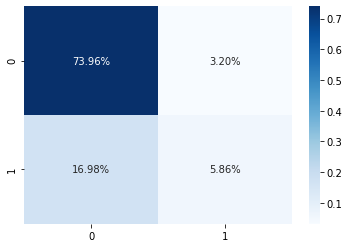

In [287]:
Mostra_ConfusionMatrix()

### 8. _Fine tuning_ da Rede Neural

Para aumentar a acurácia da Rede Neural, sugiro aumentarmos o número de neurônios na _Hidden Layer_ e/ou aumentar o número de _Hidden Layers_.

No entanto, obtivemos uma acurácia razoável com a Rede Neural _baseline_. Portanto, deixo como exercício para os alunos o desafio de melhorar a acurácia desta Rede Neural.

### 9. Fazer Predições com a Rede Neural

[**Python**] - Comando:
* RN.predict_classes(X_treinamento);
* RN.predict_classes(X_teste).

In [288]:
y_test = RN.predict_classes(X_test)
y_test


array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
    

In [218]:
np.array(X_test.index)

array([ 3411,  2177,  8400,   464,  6672,  2388,  4493, 10830,  4914,
        7044,  1386, 11248,  7517, 10880,  4691,  6642,  4304, 11225,
        9152,  7014,  1278,  4681,  8477, 10627,  5437,  7720,  7936,
         267,  8062,   872,  9367,  3856,  1694, 10028,  4751, 10604,
       10460,  1618,  4644, 10761,  1482, 11724,  5578,  3093,  2836,
        6906, 10209,   844, 11420,   992,  1117,  8612,  4225, 10577,
        1078, 10832,  1162,  6730,  5325,  8263,  3169, 11732,  7680,
        7878, 11981,  7855,  1973,  6056,  6956, 10315,  8314,  5891,
        6797,   714,  5247,   308, 10463,  2460,  4496,  7093,  6101,
       10063,  5528, 10120, 11394,  1407, 10897,  9688,  1418,  4677,
        9640,  3899, 11075,  8255,  9503, 11112,  2577,  2901,  5434,
        3608, 11512,  1706,  4946, 10613,  4087,  9499,  7339,  2232,
        9987,  3724, 11593,  1711, 10679, 10896, 11426,  8391,  1324,
        8909,  5971,  8221,  4408,  6063, 11919,  5465,  8796,  9358,
        1804,  9467,

In [289]:
df_submit = pd.concat([pd.DataFrame(X_test.index,columns=['id']),pd.DataFrame(y_test,columns=['target']).astype('boolean')],axis=1)



In [290]:
df_submit.head()

,id,target
0,3411,False
1,2177,False
2,8400,False
3,464,False
4,6672,False


In [292]:
df_submit.to_csv('/PyLadies_NL_18.csv',index = False, sep = ',')

In [291]:
df_submit['target'].value_counts()

False    887
True     113
Name: target, dtype: Int64

### 10. Conclusões

Desenvolvemos uma Rede Neural capaz de identificar Sexo (_Gender_) com acurácia= 0.9120.

### Salvar a Rede Neural

In [293]:
# Save the weights
RN.save('/RN_18.h5')